# Intro to machine learning

### 1. The basics

Suppose we have some data we wish to make predictions on. We can do this by building a model. There are many different ways, and the best model depends on the type of problem we are trying to solve. We could try and predict a stock price, or whether an image contains a cat, or the genre of a piece of music - the possibilities are practically endless. 

Machine learning is split into two main categories, supervised and unsupervised learning. Supervised learning is where we have data in the form of predictors, $X$, and a response, $y$. This is split into two futher categories, regression and classification. In regression, we are trying to predict a real number, e.g. a stock price, and in classification we are trying to predict the class of the data, e.g. cat or no cat. The aim of supervised learning is to build a model that predicts the response as accurately as possible. Unsupervised learning is where we don't have a response, which could be useful to find the most useful predictors in a dataset, but there are many other applications. In an example of supervised learning, $X$ could be an image of a handwritten digit and $y$ could be the digit shown in the image. We assume the response is modeled by $y = f(X) + \varepsilon$, where $f$ is some fixed but unknown function of the predictors and $\varepsilon$ is a zero-mean random noise term. The point to take away is that $f$ explains all the *systematic* information that $X$ contains about $y$. In reality, we can never find a perfect $f$. However, we can do a pretty good job if we have enough data and have picked the right model.

We call our model $\hat{f}$, and its predictions are $\hat{y} = \hat{f}(X)$. The hat above both of these signifies that it is not the optimum function or prediction. There are two errors that can be present in the model. 
> 1. $\hat{f}$ is an imperfect estimate of $f$, which we call a *reducible error*
> 2. Inherent unpredictability: $\varepsilon \neq 0$. We call this an *irreducible error*

### 2. A basic model

The simplest model we can choose is *linear regression*. In this model, $\hat{f}$ takes the form $\hat{f}(X) = \beta_0 + (\beta_1 x_1 + \beta_2 x_2 + ... + \beta_p x_p)$, where $p$ is the number of predictors we have and $\beta$ are the  *parameters* of the model. Finding the best set of parameters for the model is called *training*. To train the model, we first need to split the data into two sets, the training and test sets. We train the model on the training set, and evaluate its performance on the test set. Training entails passing the data through the model, checking it's output against the true value. We update the parameters as we go and try to find the best ones to predict the response as accurately as we can. 

### 3. Overfitting vs Underfitting

The degrees of freedom of the model is called *flexibility*. A very flexible model will fit very well to the training dataset, but will fail to make good predictions on the testing set. Below is a graphical example of this. 
![supervised.png](https://drive.google.com/uc?export=view&id=1dkc3TlJXrc1biqeX4_070ZFIznagj0rN)

Now, let's write some code to really see how this all works.

In [2]:
# Useful imports
import numpy as np 
import matplotlib.pyplot as plt

Let's start with a simple linear regression. The module `sklearn` has many useful functions we can use for this. 

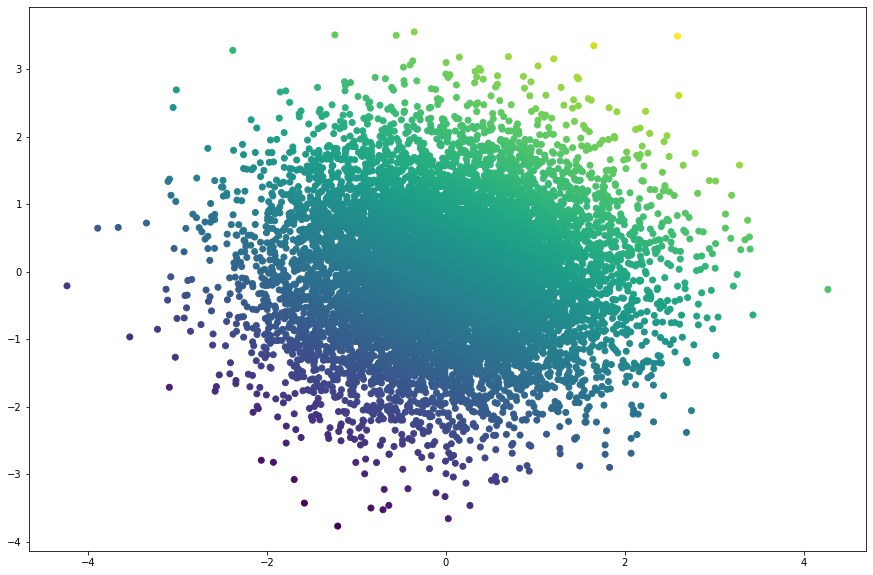

In [4]:
# We will use this function to synthesise a dataset
from sklearn.datasets import make_regression

# We have 500 samples, and 2 predictors
X, y = make_regression(n_samples=10000, n_features=2)

# Plotting the data with the color based on the response
plt.figure(figsize=(15, 10))
plt.scatter(X[:, 0], X[:, 1], c = y/y.max())
plt.show()

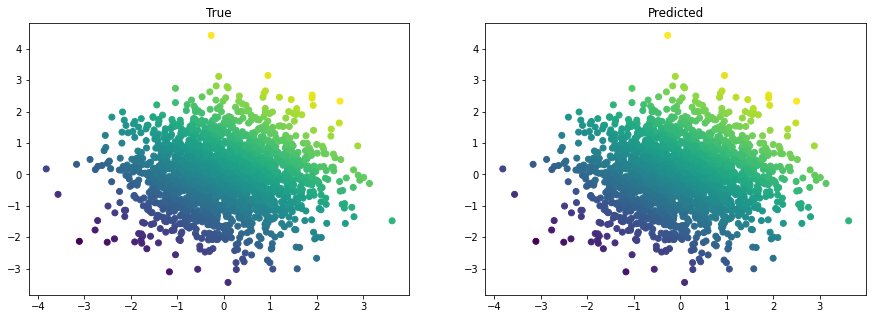

In [ ]:
# This function will split the data into training and test sets
from sklearn.model_selection import train_test_split

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Importing the model
from sklearn.linear_model import LinearRegression

# Defining the model
reg = LinearRegression()

# Fitting the model
reg.fit(X_train, y_train)

# Predicting the values of the test set
y_pred = reg.predict(X_test)

# Plotting the test set, with predicted and true color values
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test/y_test.max())
plt.title('True')
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_pred/y_pred.max())
plt.title('Predicted')
plt.show()

### 4. Metrics
We need to evaluate the performance of the model. For classification this is easier, as we can simply add up the number of times the model predicted the right class and divide by the number of datapoints. It's a little trickier with regression, as we are predicting a real number. We can use two metrics, the mean-squared error and the $R^2$ score. Mean-squared error is defined as, 
$$MSE = \frac{1}{n} \sum^n_{i=1}(y_i - \hat{y_i})^2 $$
and the $R^2$ score is, 
$$R^2 = 1 - \frac{\mbox{Unexplained variation}}{\mbox{Total variation}}$$
A good model will have a low MSE compared to the values of $y$ and an $R^2$ close to 1.

In [ ]:
# Importing functions to calculate these metrics
from sklearn.metrics import mean_squared_error, r2_score

# Calculating the metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#Printing results
print(f'MSE: {mse}, R^2: {r2}')

MSE: 2.3320132758485616e-28, R^2: 1.0


Our model has done very well!

### 5. Neural networks

We have seen an example of a classical machine learning technique. Though useful, these models on more complex problems. Neural networks have been around for a while, but the recent imporovements in computational power and the vast amounts of data available have catapulted them to the forefront of machine learning. Though they look complex, they are fairly simple in their operation. Below is an image of a simple neural network.

![nn.png](https://drive.google.com/uc?export=view&id=11Aubj8QLtbKDSKTDWRgoVcgawaDp2PLb)

The number of nodes on the left hand side corresponds to the number of predictors in the training set. The number of nodes at the end corresponds to the type of problem we are trying to solve - for regression, we need one node as we are predicting a real number. For classification, the number of nodes in the output is the number of classes we have. Each node takes in inputs, multiplies them by a weight, adds a bias and puts that whole sum into an *activation function*.

![node.png](https://drive.google.com/uc?export=view&id=1Cb4v-Jpq0xLz2CbSRDndeKE4JZIkXw_s)


To train, we propogate the data through the network, and we get an output. We can calculate a *loss function*, a measure of how good the network is. Using the chain rule and some fancy algebra, we can calculate the derivative of the loss function with respect to the weights of the network. We can then update the weights by 'travelling down' the gradient to find a minium, as shown below.
$$ w_{ij, new} = w_{ij} - \eta \frac{\partial \mbox{ loss}}{\partial w_{ij}}$$
Where $\eta$ is the learning rate - the rate at which the network learns. We typically choose values between 0.1 and 0.001. Using this strategy, called *backpropogation*, we can train each weight to optimise the network The full picture is a little more complicated but there are plenty of good resources if you want to dive into the maths. Choosing the right architecture, loss function and optimizer are crucial for good network performance. We will now try an example, using the MNIST dataset of handwritten digits.

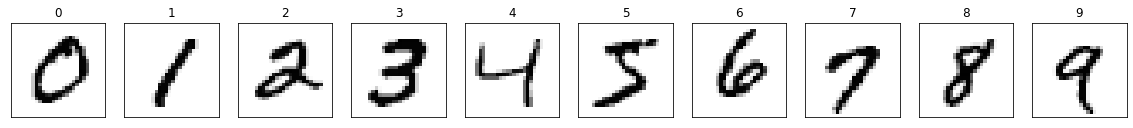

In [ ]:
# Import tensorflow and the dataset
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Loading in the data - these are 28x28 images
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Scaling pixel values between 0 and 1
X_train = X_train / 255
X_test = X_test / 255


# Plotting an image from each class
plt.figure(figsize=(20,5))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[y_train == i][0], cmap='Greys')
    plt.xticks([])
    plt.yticks([])
    plt.title(f'{i}')
plt.show()

Let's start with a simple feedforward network, like the picture above but with more layers.

In [ ]:
# Defining the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # Flattens the input into one long vector
  tf.keras.layers.Dense(128, activation='relu'), # Hidden layers
  tf.keras.layers.Dense(128, activation='relu'), 
  tf.keras.layers.Dense(10, activation='softmax') # Output
])

# Compiling the model, defining a loss function, optimizer and metrics
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'],
)

# Training the model for 10 epochs (pass through all the data)
model.fit(
    X_train,
    y_train,
    epochs=10,
)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5584 - accuracy: 0.8705
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3458 - accuracy: 0.9233
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2503 - accuracy: 0.9410
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1867 - accuracy: 0.9520
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1518 - accuracy: 0.9586
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1368 - accuracy: 0.9621
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1256 - accuracy: 0.9663
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1161 - accuracy: 0.9688
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1042 - accuracy: 0.9712
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.097

In [ ]:
# Predicting the classes of the training set. The model returns a list of vectors so we need to take
# an argmax (index of max value) to find the prediction
y_pred = model.predict(X_test, verbose=1).argmax(1)

print(f'Test accuracy: {(y_pred == y_test).mean()}')

313/313 [==============================] - 1s 2ms/step
Test accuracy: 0.9628


We have a good model for this! 96% accuracy is very good. For the next task, we will try to predict the class of some more complex imaged. We will need to use a convolutional neural network for this.

### 6. Convolutional neural networks

Basic feedforward neural networks, like the one shown above are great for simpler tasks. However, there is a different architecture we can use to improve the model's performance on image recognition tasks. We use a *convolutional* neural network that convolves the image to extract features. This type of neural network has been very popular in current years and are used for a wide variety of tasks. 
![conv.png](https://drive.google.com/uc?export=view&id=1JkdyEDSoHrhTK2zyBfmE1yeD6wD5dCyZ)

We will now use a convolutional neural network, along with some more advanced tensorflow techniques to classify the images in the `fashion_mnist` dataset.

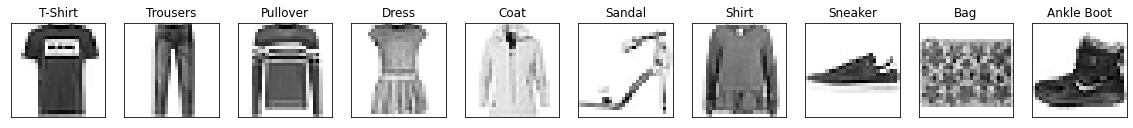

In [ ]:
# Importing the dataset
from tensorflow.keras.datasets import fashion_mnist

# Loading data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


# Scaling the data
X_train = X_train / 255
X_test = X_test / 255

# Making a list of the class names
class_names = [
    'T-Shirt', 'Trousers', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot'
]

# Plotting an image from each class
plt.figure(figsize=(20,5))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[y_train == i][0], cmap='Greys')
    plt.xticks([])
    plt.yticks([])
    plt.title(class_names[i])
plt.show()

In [ ]:
# Functions for plotting the training history and a confusion matrix 

def plot_history(history):
    """
    Plots the accuracy and loss on the training and validation data for each epoch.

    Arguments:
    history : keras.callbacks.History
    """
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label="training loss")
    plt.plot(history.history['val_loss'], label="val loss")
    plt.legend(loc='upper right')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label="training accuracy")
    plt.plot(history.history['val_accuracy'], label="val accuracy")
    plt.legend(loc='lower right')

    plt.show()
    
def plot_confusion_matrix(y_test, y_pred, class_names):
    """
    Plots a confusion matrix.
    
    Arguments:
    y_test : numpy array of true image class, dimensions (n_ims,)
    y_pred : np array of predicted imaga class, dimensions (n_ims,)
    class_names : list or np array of class names for titles, dimension (nims)
    """
    import seaborn as sns
    from sklearn.metrics import confusion_matrix
    plt.figure(figsize=(15, 15))
    conf = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf, annot=True ,xticklabels=class_names, yticklabels=class_names, fmt='g', cbar=False )
    plt.show()

In [ ]:
# Defining parameters for the neural network
loss = 'sparse_categorical_crossentropy'
metrics = ["accuracy"] 
EPOCHS = 40
BATCH_SIZE = 128 # Number of datapoints that are passed through before weights are updated
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
# Defining the convolutional neural network
model = tf.keras.models.Sequential([
    # Convolution layers
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25), # Dropout randomly deactivates neurons to reduce overfitting
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    # Classification layers
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax'),
        ])

# Compiling the model
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [ ]:
# Checkpoint for saving the best model weights if the accuracy improves
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "model.h5", 
    monitor='val_accuracy',
    verbose = 1,
    save_best_only = True
)

# Stops training if val loss has not improved for 5 epochs
earlystopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    verbose=1
)

# Learning rate decay after 10 epochs
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Setting up learning rate scheduler
lr_scheduler= tf.keras.callbacks.LearningRateScheduler(scheduler)

# Initialising callbacks list
callbacks_list = [checkpoint, earlystopping, lr_scheduler]

In [ ]:
# Splitting the training set into training and validation sets for the early stopping conditions
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)

In [ ]:
# Training the model 
history = model.fit(
    X_train,
    y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_val, y_val), 
    callbacks=callbacks_list
)

Epoch 1/40


2022-08-16 10:44:26.811678: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


422/422 [==============================] - ETA: 0s - loss: 0.6283 - accuracy: 0.7672

2022-08-16 10:44:34.176020: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_accuracy improved from -inf to 0.83700, saving model to model.h5
422/422 [==============================] - 8s 16ms/step - loss: 0.6283 - accuracy: 0.7672 - val_loss: 0.4462 - val_accuracy: 0.8370 - lr: 2.2313e-04
Epoch 2/40
420/422 [============================>.] - ETA: 0s - loss: 0.4371 - accuracy: 0.8418
Epoch 2: val_accuracy improved from 0.83700 to 0.85833, saving model to model.h5
422/422 [==============================] - 6s 15ms/step - loss: 0.4373 - accuracy: 0.8416 - val_loss: 0.3892 - val_accuracy: 0.8583 - lr: 2.2313e-04
Epoch 3/40
420/422 [============================>.] - ETA: 0s - loss: 0.3933 - accuracy: 0.8574
Epoch 3: val_accuracy improved from 0.85833 to 0.86883, saving model to model.h5
422/422 [==============================] - 6s 15ms/step - loss: 0.3936 - accuracy: 0.8574 - val_loss: 0.3594 - val_accuracy: 0.8688 - lr: 2.2313e-04
Epoch 4/40
421/422 [============================>.] - ETA: 0s - loss: 0.3608 - accuracy: 0.8667
Epoch 4: val_accuracy im

Epoch 27/40
421/422 [============================>.] - ETA: 0s - loss: 0.2105 - accuracy: 0.9219
Epoch 27: val_accuracy improved from 0.91367 to 0.91600, saving model to model.h5
422/422 [==============================] - 6s 15ms/step - loss: 0.2107 - accuracy: 0.9218 - val_loss: 0.2385 - val_accuracy: 0.9160 - lr: 4.0762e-05
Epoch 28/40
420/422 [============================>.] - ETA: 0s - loss: 0.2086 - accuracy: 0.9210
Epoch 28: val_accuracy did not improve from 0.91600
422/422 [==============================] - 6s 15ms/step - loss: 0.2085 - accuracy: 0.9210 - val_loss: 0.2413 - val_accuracy: 0.9135 - lr: 3.6883e-05
Epoch 29/40
421/422 [============================>.] - ETA: 0s - loss: 0.2063 - accuracy: 0.9232
Epoch 29: val_accuracy did not improve from 0.91600
422/422 [==============================] - 6s 15ms/step - loss: 0.2064 - accuracy: 0.9231 - val_loss: 0.2392 - val_accuracy: 0.9140 - lr: 3.3373e-05
Epoch 30/40
421/422 [============================>.] - ETA: 0s - loss: 0.206

In [ ]:
# Loading the best weights 
model.load_weights("model.h5")

# Predicting on the test set 
y_pred = model.predict(X_test).argmax(1)

# Printing the accuracy
print(f'Accuracy: {(y_test == y_pred).mean()}')

 72/313 [=====>........................] - ETA: 0s

2022-08-16 10:47:51.700613: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step
Accuracy: 0.9121


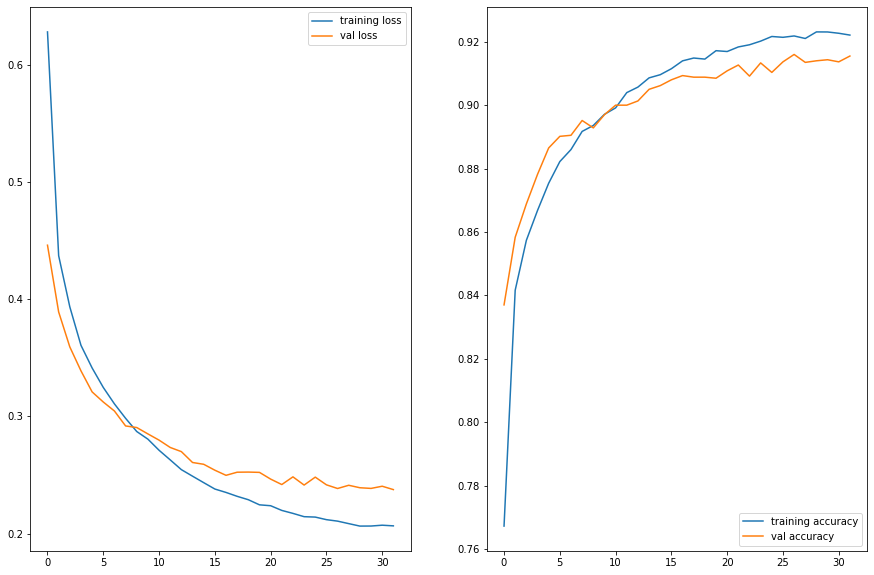

In [ ]:
# Plotting the training history
plot_history(history)

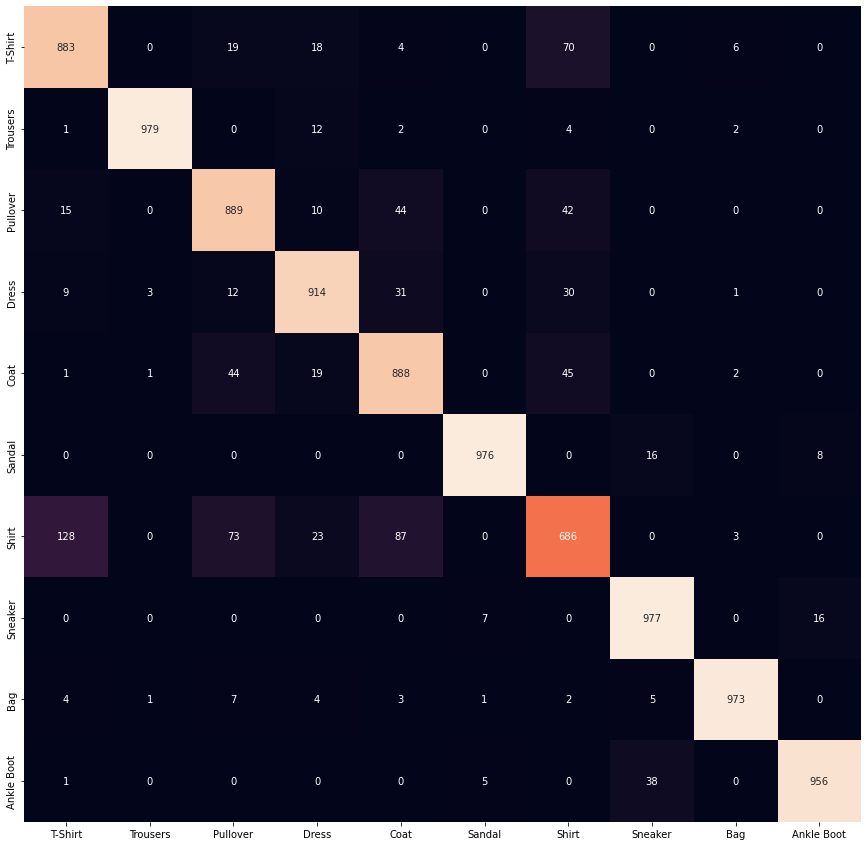

In [ ]:
# Plotting a confusion matrix of predictions
plot_confusion_matrix(y_test, y_pred, class_names)